# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [4]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
# Your code here:
customers.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [6]:
# Your observations here
customers = pd.get_dummies(customers, columns=['Region'], prefix='Region')
customers

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
0,2,12669,9656,7561,214,2674,1338,0,0,1
1,2,7057,9810,9568,1762,3293,1776,0,0,1
2,2,6353,8808,7684,2405,3516,7844,0,0,1
3,1,13265,1196,4221,6404,507,1788,0,0,1
4,2,22615,5410,7198,3915,1777,5185,0,0,1
...,...,...,...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204,0,0,1
436,1,39228,1431,764,4510,93,2346,0,0,1
437,2,14531,15488,30243,437,14841,1867,0,0,1
438,1,10290,1981,2232,1038,168,2125,0,0,1


In [7]:
customers = pd.get_dummies(customers, columns=['Channel'], prefix='Channel')
customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2
0,12669,9656,7561,214,2674,1338,0,0,1,0,1
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1,1,0
4,22615,5410,7198,3915,1777,5185,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,0,1,1,0
436,39228,1431,764,4510,93,2346,0,0,1,1,0
437,14531,15488,30243,437,14841,1867,0,0,1,0,1
438,10290,1981,2232,1038,168,2125,0,0,1,1,0


In [8]:
# Your comment here\
from scipy.stats import skew

# Calculate skewness for each column
skewness = customers.apply(skew)
skewness

#Positive skewness indicates a right-skewed distribution, while negative skewness indicates a left-skewed distribution.

Fresh                2.552583
Milk                 4.039922
Grocery              3.575187
Frozen               5.887826
Detergents_Paper     3.619458
Delicassen          11.113534
Region_1             1.710674
Region_2             2.545839
Region_3            -0.969944
Channel_1           -0.758355
Channel_2            0.758355
dtype: float64

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [9]:
# Your code here

In [10]:
#DONE ABOVE

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [11]:
# Your import here:


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customers_scale= scaler.fit_transform(customers)

df_s = pd.DataFrame (customers_scale, columns = customers.columns)

print(customers.mean())
print(customers.std())



Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Region_1                0.175000
Region_2                0.106818
Region_3                0.718182
Channel_1               0.677273
Channel_2               0.322727
dtype: float64
Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicassen           2820.105937
Region_1                0.380400
Region_2                0.309234
Region_3                0.450397
Channel_1               0.468052
Channel_2               0.468052
dtype: float64


In [12]:
customers_scale

array([[ 0.05293319,  0.52356777, -0.04111489, ...,  0.62642243,
        -1.44865163,  1.44865163],
       [-0.39130197,  0.54445767,  0.17031835, ...,  0.62642243,
        -1.44865163,  1.44865163],
       [-0.44702926,  0.40853771, -0.0281571 , ...,  0.62642243,
        -1.44865163,  1.44865163],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, ...,  0.62642243,
        -1.44865163,  1.44865163],
       [-0.13538389, -0.51753572, -0.60251388, ...,  0.62642243,
         0.69029709, -0.69029709],
       [-0.72930698, -0.5559243 , -0.57322717, ...,  0.62642243,
         0.69029709, -0.69029709]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [13]:
customers_scale

array([[ 0.05293319,  0.52356777, -0.04111489, ...,  0.62642243,
        -1.44865163,  1.44865163],
       [-0.39130197,  0.54445767,  0.17031835, ...,  0.62642243,
        -1.44865163,  1.44865163],
       [-0.44702926,  0.40853771, -0.0281571 , ...,  0.62642243,
        -1.44865163,  1.44865163],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, ...,  0.62642243,
        -1.44865163,  1.44865163],
       [-0.13538389, -0.51753572, -0.60251388, ...,  0.62642243,
         0.69029709, -0.69029709],
       [-0.72930698, -0.5559243 , -0.57322717, ...,  0.62642243,
         0.69029709, -0.69029709]])

/Users/abrahamjessediazperiano/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


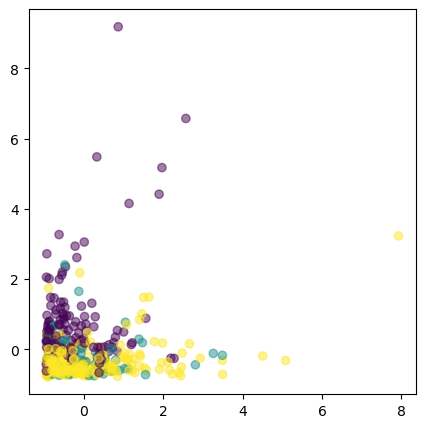

In [25]:
from sklearn import cluster, datasets

kmeans = cluster.KMeans(n_clusters = 3) #model
kmeans.fit(customers_scale) #fit
pred = kmeans.predict(customers_scale) #prediction
labels = kmeans.labels_


plt.figure(figsize=(5,5))
plt.scatter(customers_scale[:,0], customers_scale[:,1], alpha=0.5, c=pred)
plt.show()

Count the values in `labels`.

In [24]:
# Your code here:

labels = kmeans.labels_
# Count the values in labels
label_counts = pd.Series(labels).value_counts()

# Add a new column 'labels' to your original dataframe
customers['labels'] = labels

# Display the counts
print(label_counts)


0    210
1    138
2     92
dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

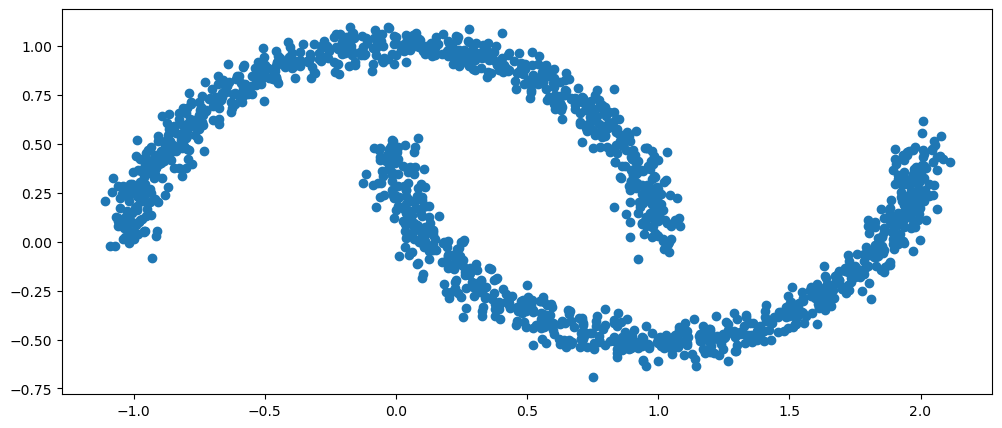

In [29]:
X, y = datasets.make_moons(n_samples = 1500, noise=0.05) #this is just the model 


plt.figure(figsize=(12,5))
plt.scatter(X[:,0], X[:,1])
plt.show()

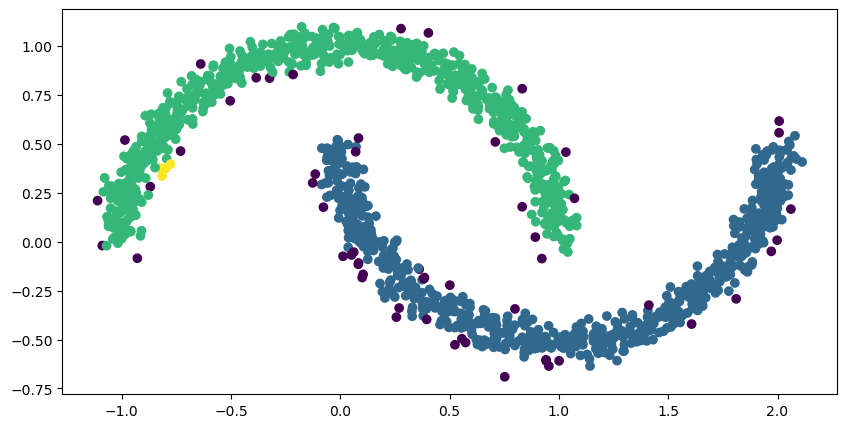

In [30]:
from sklearn.cluster import DBSCAN
import pandas as pd

dbscan = cluster.DBSCAN(eps = 0.05, min_samples = 5)  # here we fit the data into the model
pred = dbscan.fit_predict(X)

plt.figure(figsize=(10,5))
plt.scatter(X[:,0], X[:,1], c=pred)
plt.show()

Count the values in `labels_DBSCAN`.

In [ ]:

labels_dbscan = dbscan.labels_
customers['labels_DBSCAN'] = labels_dbscan
print(customers['labels_DBSCAN'].value_counts())

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

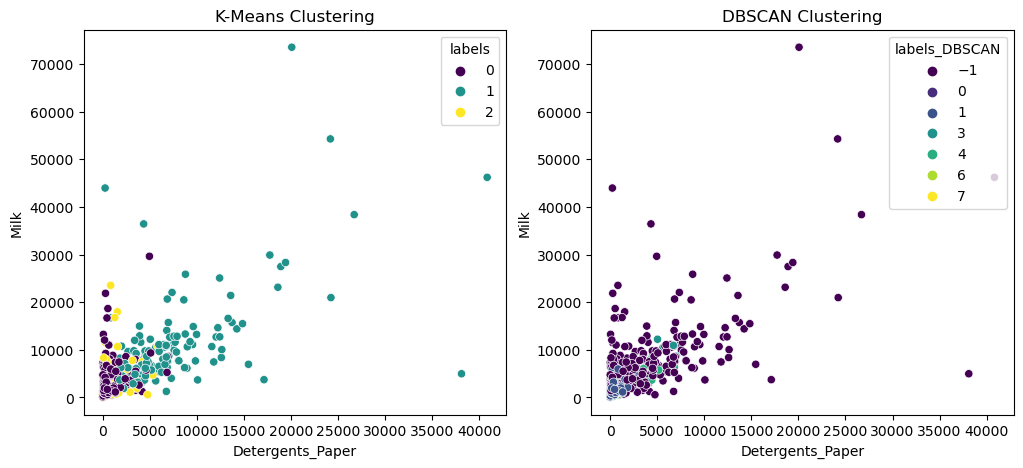

In [34]:

import matplotlib.pyplot as plt
import seaborn as sns


#Detergents_Paper vs Milk - K-Means 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Detergents_Paper', y='Milk', hue='labels', data=customers, palette='viridis')
plt.title('K-Means Clustering')



# Detergents_Paper vs Milk - DBSCAN 
plt.subplot(1, 2, 2)
sns.scatterplot(x='Detergents_Paper', y='Milk', hue='labels_DBSCAN', data=customers, palette='viridis')
plt.title('DBSCAN Clustering')

plt.show()





Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

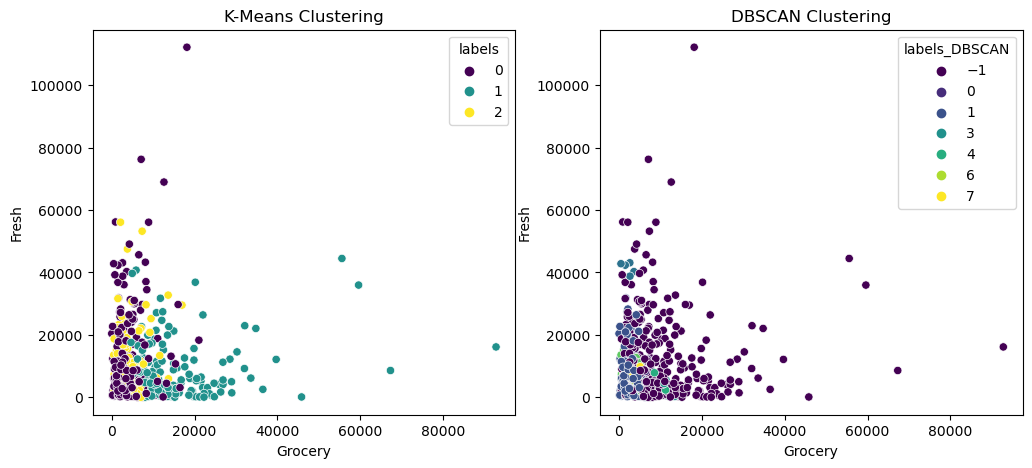

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns


# Grocery vs Fresh - K-Means 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Grocery', y='Fresh', hue='labels', data=customers, palette='viridis')
plt.title('K-Means Clustering')

# Grocery vs Fresh - DBSCAN 
plt.subplot(1, 2, 2)
sns.scatterplot(x='Grocery', y='Fresh', hue='labels_DBSCAN', data=customers, palette='viridis')
plt.title('DBSCAN Clustering')

plt.show()





Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

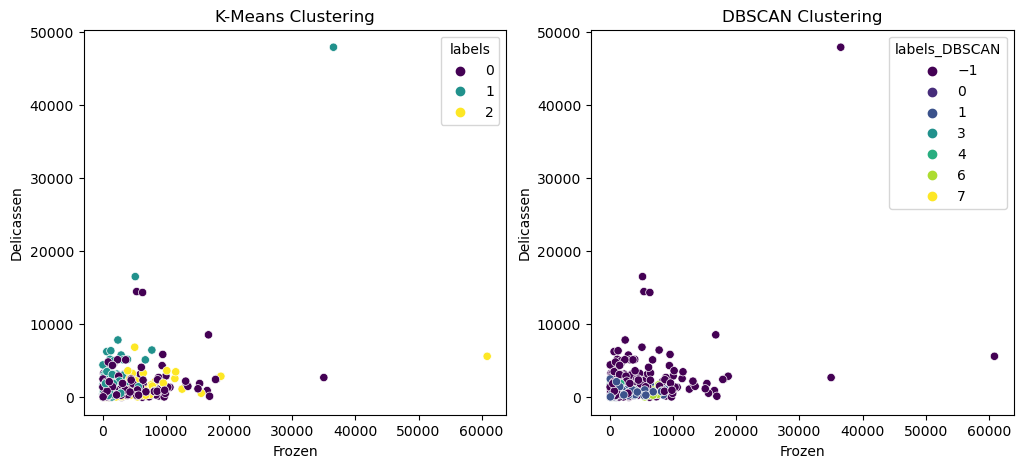

In [37]:
# Your code here:

# Your code here:
import matplotlib.pyplot as plt
import seaborn as sns


#  Frozen vs Delicassen - K-Means 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Frozen', y='Delicassen', hue='labels', data=customers, palette='viridis')
plt.title('K-Means Clustering')


# Frozen vs Delicassen  - DBSCAN 
plt.subplot(1, 2, 2)
sns.scatterplot(x='Frozen', y='Delicassen', hue='labels_DBSCAN', data=customers, palette='viridis')
plt.title('DBSCAN Clustering')

plt.show()





Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [39]:
customers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2,labels,labels_DBSCAN
0,12669,9656,7561,214,2674,1338,0,0,1,0,1,1,-1
1,7057,9810,9568,1762,3293,1776,0,0,1,0,1,1,-1
2,6353,8808,7684,2405,3516,7844,0,0,1,0,1,1,-1
3,13265,1196,4221,6404,507,1788,0,0,1,1,0,0,1
4,22615,5410,7198,3915,1777,5185,0,0,1,0,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0,0,1,1,0,0,-1
436,39228,1431,764,4510,93,2346,0,0,1,1,0,0,-1
437,14531,15488,30243,437,14841,1867,0,0,1,0,1,1,-1
438,10290,1981,2232,1038,168,2125,0,0,1,1,0,0,1


In [48]:
            
#'labels'
kmeans_means = customers.groupby('labels').mean()
kmeans_means




,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2,labels_DBSCAN
labels,,,,,,,,,,,,
0,13768.676190,3294.300000,3809.195238,3500.342857,789.290476,1297.214286,0.000000,0.000000,1.000000,1.000000,0.000000,0.309524
1,9038.065217,11199.934783,16732.543478,1746.434783,7409.782609,2088.949275,0.101449,0.130435,0.768116,0.007246,0.992754,-0.565217
2,12407.130435,3401.771739,4234.130435,4082.282609,864.739130,1198.402174,0.684783,0.315217,0.000000,0.945652,0.054348,1.326087


In [49]:

#'labels_DBSCAN'
dbscan_means = customers.groupby('labels_DBSCAN').mean()
dbscan_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3,Channel_1,Channel_2,labels
labels_DBSCAN,,,,,,,,,,,,
-1,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.192157,0.164706,0.643137,0.509804,0.490196,0.937255
0,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
1,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
2,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
4,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
5,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
6,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
7,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000


In [ ]:
# Your observations here

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here